In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#getting data

In [4]:
df = pd.read_csv('/content/Moviesinfo (1).csv')
df

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,TableNo.21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,AmitSahniKiList,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,RajdhaniExpress,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,BobbyJasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,DumLagaKeHaisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,DilliwaliZaalimGirlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


# Data cleaning

In [11]:
#Change datatype ReleaseDate column

df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

<ipython-input-11-33285ca433cf>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])


# Add new colums

In [34]:
# add colume year
df['Year'] = df['ReleaseDate'].dt.year
# add column month
df['Month'] = df['ReleaseDate'].dt.month


In [41]:
#  Calculate ROI
df['ROI'] = ((df['BoxOfficeCollection'] - df['Budget'])/df['Budget'])*100


## Q1. How many records are present in the dataset?

In [6]:
df.shape[0]

149

## Q2. How many movies were released in each Release Time? Sort number of releases in Release Time in descending order.

In [7]:
df['ReleaseTime'].value_counts()

,count
ReleaseTime,
N,99
HS,18
FS,17
LW,15


## Q3. Which genre had highest number of releases during the Festive Season?

In [8]:
df[df['ReleaseTime'] == 'FS']['Genre'].value_counts()

,count
Genre,
Drama,4
Thriller,4
Action,3
Romance,3
Comedy,3


## Q4. How many movies in each genre got released in different release times like long weekend, festive season, etc.

In [9]:
df.groupby(['Genre','ReleaseTime']).size()

Genre     ReleaseTime
Action    FS              3
          HS              3
          LW              3
          N              15
Comedy    FS              3
          HS              5
          LW              5
          N              23
Drama     FS              4
          HS              6
          LW              1
          N              24
Romance   FS              3
          HS              3
          LW              4
          N              15
Thriller  FS              4
          HS              1
          LW              2
          N              22
dtype: int64

## Q5. In which year were maximum number movie released?

In [12]:
df['ReleaseDate'].dt.year.value_counts()

,count
ReleaseDate,
2014,70
2013,67
2015,12



## Q6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 30 crore or more?

In [40]:
result = df[df['Budget'] > 30]
result.groupby(['Year','Month'])['Budget'].count()

Year  Month
2013  1        2
      2        2
      3        1
      5        2
      6        1
      7        1
      8        4
      9        3
      10       2
      11       2
2014  1        2
      2        2
      4        3
      5        1
      6        3
      7        1
      8        3
      10       2
      11       3
      12       2
2015  1        2
      2        2
      3        1
Name: Budget, dtype: int64

## Q7. Which are the top 10 flop movies with minimum return on investment (ROI)?

In [50]:
df.sort_values(by='ROI',ascending=True)[['MovieName','Budget','BoxOfficeCollection','ROI']].head(10)


,MovieName,Budget,BoxOfficeCollection,ROI
9,Gangoobai,2,0.01,-99.500000
15,Bandook,4,0.09,-97.750000
53,SonaSpa,10,0.24,-97.600000
3,RajdhaniExpress,7,0.35,-95.000000
49,KyaDilliKyaLahore,7,0.50,-92.857143
121,Satya2,15,1.10,-92.666667
67,PuraniJeans,10,1.10,-89.000000
103,SamratandCo.,18,2.00,-88.888889
30,Heartless,12,1.50,-87.500000
102,Kaanchi,31,4.00,-87.096774



## Q8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [53]:
df.groupby('ReleaseTime')['ROI'].mean()

,ROI
ReleaseTime,
FS,97.385320
HS,85.086678
LW,112.720531
N,65.772163


## Q9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [55]:
result = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
if result > 0:
  print('positive correlation')
else:
  print('negative correlation')


positive correlation



## Q10. Which genre of movies typically sees more YouTube views? Draw boxplots for each genre of movies to compare.

In [56]:
df.groupby('Genre')['YoutubeViews'].sum()

,YoutubeViews
Genre,
Action,136611593
Comedy,91313029
Drama,93525532
Romance,86882563
Thriller,89017350


<ipython-input-59-ae86ac2eff74>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre',y='YoutubeViews',data=df, palette="coolwarm")


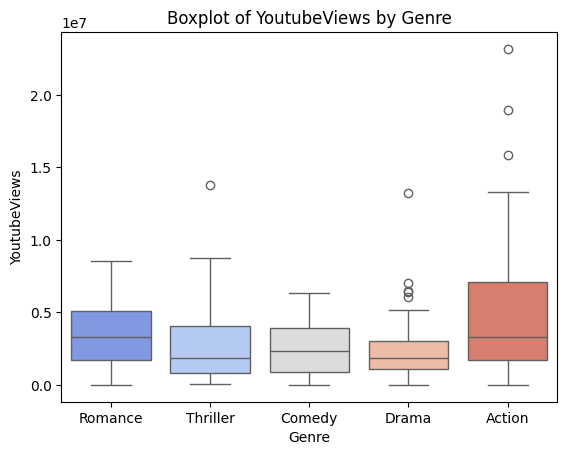

In [59]:
sns.boxplot(x='Genre',y='YoutubeViews',data=df, palette="coolwarm")
plt.xlabel('Genre')
plt.ylabel('YoutubeViews')
plt.title('Boxplot of YoutubeViews by Genre')
plt.show()



## Q11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated

In [60]:
df_corr = df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']]
df_corr.corr()

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


<Axes: >

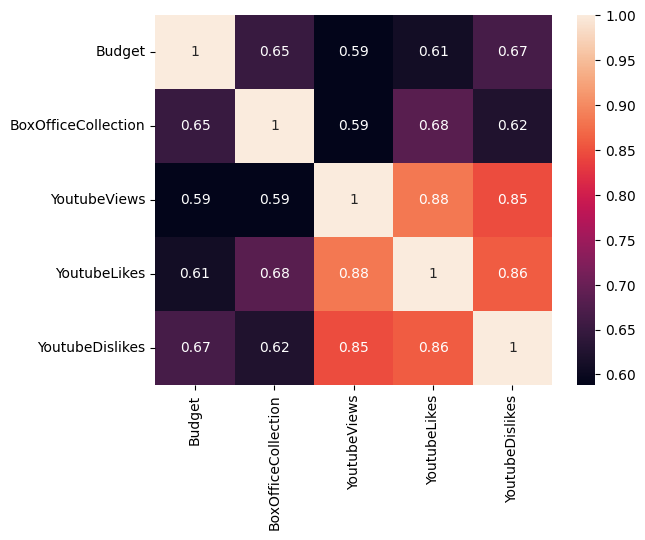

In [62]:
sns.heatmap(df_corr.corr(),annot=True)

## Q13. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

In [63]:
df.groupby('Year')['MovieName'].count()

,MovieName
Year,
2013,67
2014,70
2015,12


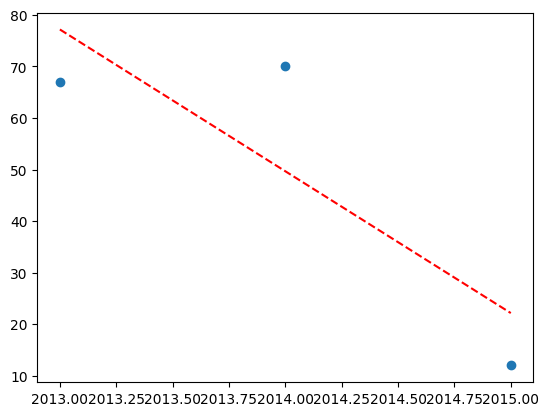

In [68]:
x = df.groupby('Year')['MovieName'].count().index
y = df.groupby('Year')['MovieName'].count().values

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.scatter(x, y, )
plt.plot(x, p(x), "r--")
plt.show()



## Q14. Find the distribution of movie budget for every Genre.

In [69]:
df.groupby('Genre')['Budget'].sum()

,Budget
Genre,
Action,1367
Comedy,910
Drama,847
Romance,629
Thriller,634


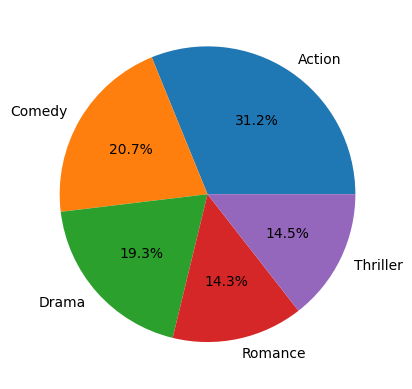

In [70]:
plt.pie(df.groupby('Genre')['Budget'].sum(),labels=df.groupby('Genre')['Budget'].sum().index,autopct='%1.1f%%')
plt.show()

<ipython-input-72-4e20f1817818>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre',y='Budget',data=df, palette="coolwarm")


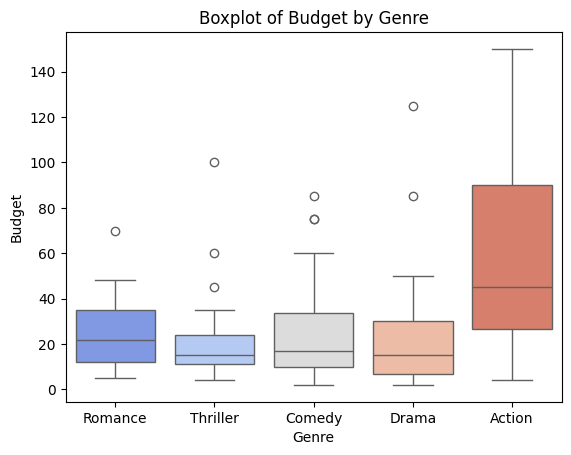

In [72]:
sns.boxplot(x='Genre',y='Budget',data=df, palette="coolwarm")
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Boxplot of Budget by Genre')
plt.show()


## Q15. During 2013−2015, Visualize the number of YouTube likes and YouTube dislikes every year. Also, visualize with best fit graph.

In [73]:
df.groupby('Year')[['YoutubeLikes','YoutubeDislikes']].sum()

,YoutubeLikes,YoutubeDislikes
Year,,
2013,324180,58156
2014,710142,104682
2015,139431,17127


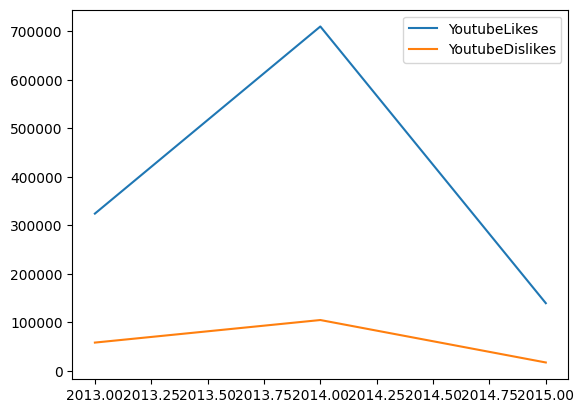

In [76]:
x = df.groupby('Year')[['YoutubeLikes','YoutubeDislikes']].sum().index
y1 = df.groupby('Year')[['YoutubeLikes','YoutubeDislikes']].sum()['YoutubeLikes'].values
y2 = df.groupby('Year')[['YoutubeLikes','YoutubeDislikes']].sum()['YoutubeDislikes'].values

plt.plot(x, y1, label = 'YoutubeLikes')
plt.plot(x, y2, label = 'YoutubeDislikes')
plt.legend()
plt.show()

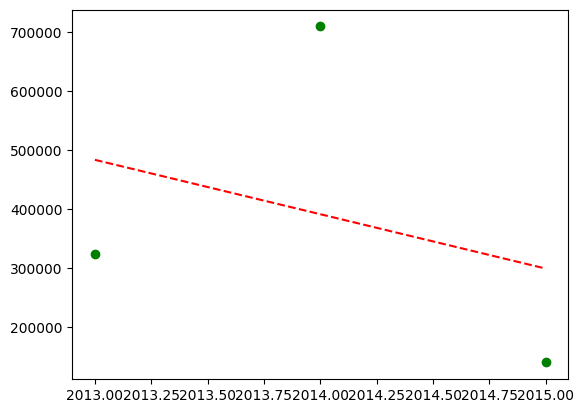

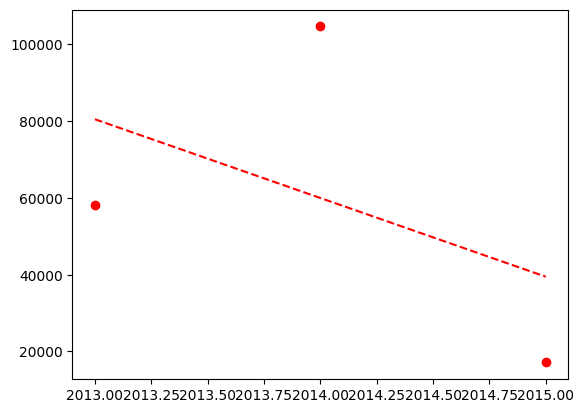

<ipython-input-86-a9d8e5a94ece>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


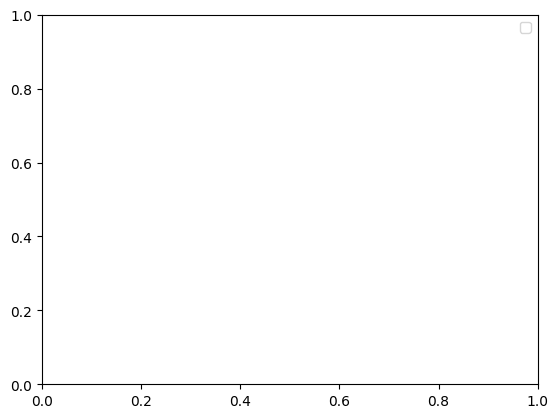

In [86]:
x = df.groupby('Year')['YoutubeLikes'].sum().index
y = df.groupby('Year')['YoutubeLikes'].sum().values
y1 = df.groupby('Year')['YoutubeDislikes'].sum().values

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

z1 = np.polyfit(x, y1, 1)
p1 = np.poly1d(z1)

plt.scatter(x, y, color='green', label='YoutubeLikes' )
plt.plot(x, p(x), "r--")
plt.show()

plt.scatter(x, y1, color='red',label ='YoutubeDislikes' )
plt.plot(x, p1(x), "r--")
plt.show()

plt.legend()
plt.show()



